In [3]:
import pandas as pd
import numpy as np

# Parameters
num_locations = 10  # Number of pickup locations
num_days = 30       # Number of days of data
peak_hours = [7, 8, 17, 18]  # Peak hours (7-9 AM, 5-7 PM)

# Generate synthetic data
data = []
for day in range(num_days):
    for hour in range(24):
        for location in range(num_locations):
            # Base demand
            demand = np.random.poisson(lam=5)  # Poisson distribution for demand
            # Increase demand during peak hours
            if hour in peak_hours:
                demand += np.random.poisson(lam=10)
            # Append to dataset
            data.append({
                'timestamp': f'2023-10-{day+1:02d} {hour:02d}:00:00',
                'location_id': location,
                'hour': hour,
                'day_of_week': (day % 7),  # 0=Monday, 6=Sunday
                'demand': demand
            })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_ride_demand.csv', index=False)
print("Synthetic dataset created and saved as 'synthetic_ride_demand.csv'.")

Synthetic dataset created and saved as 'synthetic_ride_demand.csv'.


In [4]:
import pandas as pd

# Load the synthetic dataset
df = pd.read_csv('synthetic_ride_demand.csv')
print(df.head())

             timestamp  location_id  hour  day_of_week  demand
0  2023-10-01 00:00:00            0     0            0       7
1  2023-10-01 00:00:00            1     0            0       5
2  2023-10-01 00:00:00            2     0            0       3
3  2023-10-01 00:00:00            3     0            0       5
4  2023-10-01 00:00:00            4     0            0       8


In [5]:
print(df.isnull().sum())

timestamp      0
location_id    0
hour           0
day_of_week    0
demand         0
dtype: int64


In [6]:
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('synthetic_ride_demand.csv')

# Scale only the features (hour)
scaler = StandardScaler()
df[['hour']] = scaler.fit_transform(df[['hour']])

# Split into features and target
X = df.drop(columns=['demand', 'timestamp'])  # Features (hour, location_id, etc.)
y = df['demand']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Feature Names Used During Training:", X_train.columns)

Feature Names Used During Training: Index(['location_id', 'hour', 'day_of_week'], dtype='object')


In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Ensure predictions are non-negative (demand cannot be negative)
y_pred = [max(0, pred) for pred in y_pred]  # Replace negative values with 0

print("Predictions:", y_pred)

Predictions: [5.468666666666667, 6.324666666666667, 4.083833333333334, 14.298095238095241, 5.420916666666667, 4.155619047619048, 4.9279285714285725, 5.966369047619047, 3.967777777777778, 4.501071428571429, 5.5015, 3.9915000000000003, 3.907428571428572, 5.001595238095238, 4.117765873015872, 6.1485, 5.304607142857144, 6.066095238095237, 16.828833333333336, 4.8495952380952385, 4.81654761904762, 5.317523809523809, 5.910126984126983, 4.761314935064936, 3.8273333333333346, 4.016047619047619, 4.186404761904762, 18.995039682539677, 5.0776666666666666, 4.1385, 2.633714285714285, 6.523476190476191, 13.357920634920635, 5.960511904761904, 16.475031746031743, 6.292309523809522, 6.675999999999999, 4.522321428571428, 4.396797619047619, 13.508126984126983, 4.514833333333334, 12.065194444444446, 3.9005873015873016, 5.137738095238095, 2.0086309523809525, 16.448476190476192, 5.745500000000002, 4.307738095238094, 4.774095238095239, 5.992166666666667, 16.166964285714286, 4.328880952380952, 2.72708730158730

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.013014741132176
R-squared: 0.5433116094064745


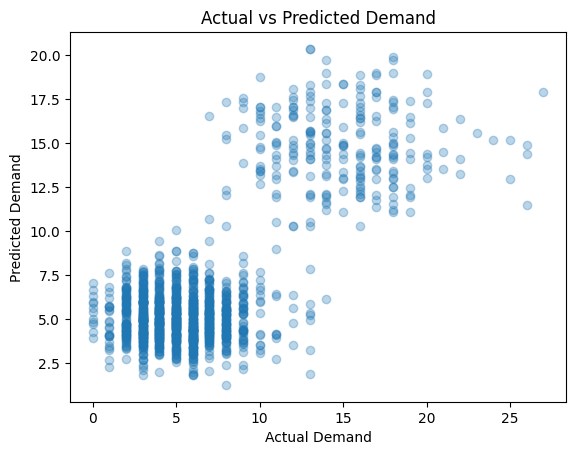

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.show()

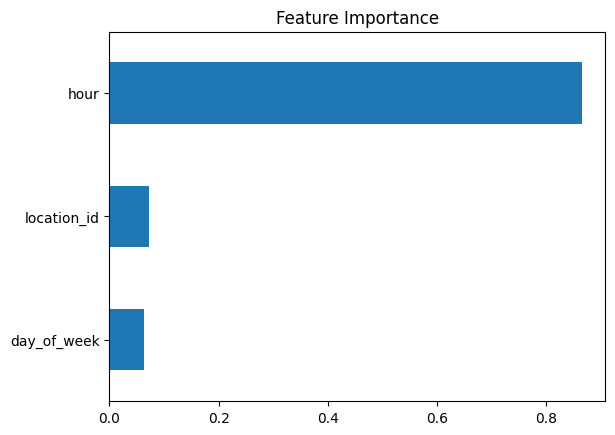

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

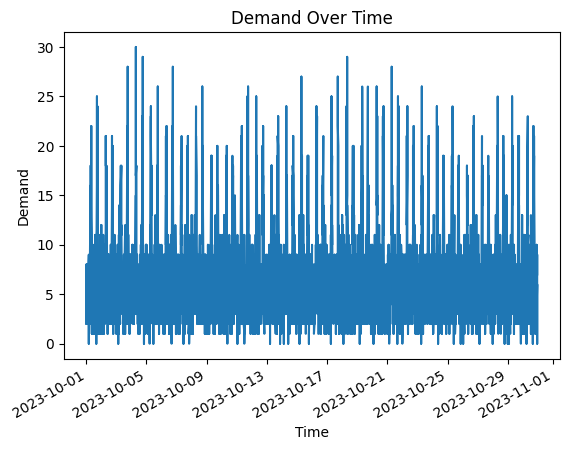

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['demand'].plot()
plt.title("Demand Over Time")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [35]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'demand_prediction_model.pkl')

['demand_prediction_model.pkl']

In [36]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [37]:
import joblib

# Load the model using the full path
model = joblib.load('/content/demand_prediction_model.pkl')

In [55]:
#prepare new data
new_data = {
    'location_id': 3,       # Example location ID
    'hour': 18,             # Example hour (5 PM)
    'day_of_week': 7
}

In [56]:
import pandas as pd

# Convert new data to DataFrame
input_data = pd.DataFrame([new_data])

In [57]:
# Predict demand
predicted_demand = model.predict(input_data)
print(f"Predicted Demand: {predicted_demand[0]}")

#the model expects approximately predicted demand of ride requests for the specified location, hour, and day of the week

Predicted Demand: 5.076746031746031
